In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

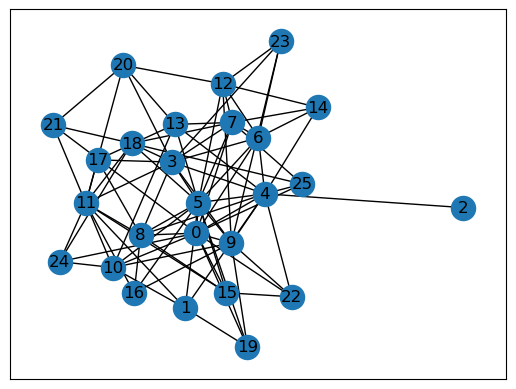

In [3]:
numV=26
# numV=14
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
mincost=-38.11808904821565
# mincost=-17.158916153194056

In [4]:
from qiskit_algorithms.optimizers import SPSA

settings={}
settings["blocking"]=True
settings["maxiter"]=10
settings["allowed_increase"]=0
settings["second_order"]=True
settings["regularization"]=0.01
spsa=SPSA(**settings)

params={'G': G, 'optimizer' : spsa}
qaoa_SPSA = QAOAMaxCut(params=params)

In [5]:
from qiskit_algorithms.optimizers import COBYLA

cobyla=COBYLA()

params={'G': G, 'optimizer' : cobyla}
qaoa_COBYLA = QAOAMaxCut(params=params)

In [6]:
qaoa_SPSA.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
qaoa_COBYLA.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


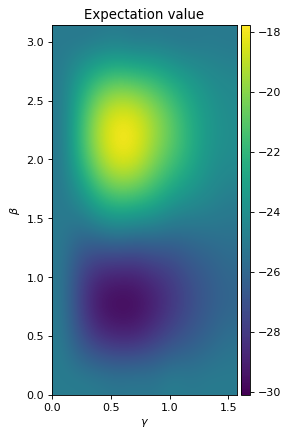

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoa_COBYLA.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [ ]:
maxdepth=10
for i in range(maxdepth):
    qaoa_COBYLA.increase_depth()
    qaoa_SPSA.increase_depth()

cost(depth= 1 )= -30.14627182244329
cost(depth= 1 )= -30.10322100967665
cost(depth= 2 )= -31.972519009426478
cost(depth= 2 )= -30.51001747508617
cost(depth= 3 )= -33.17915235181611
cost(depth= 3 )= -33.12539200505988
cost(depth= 4 )= -34.02026957992272
cost(depth= 4 )= -33.95282348171259
cost(depth= 5 )= -34.75108984974005
cost(depth= 5 )= -34.65250583642055
cost(depth= 6 )= -35.04120025199754
cost(depth= 6 )= -34.97668367973905


In [ ]:
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoa_COBYLA.costval.values()))/mincost,'o--')
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoa_SPSA.costval.values()))/mincost,'x:')
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')

In [ ]:
pl.plot(np.arange(1,maxdepth+1),qaoa_COBYLA.angles_hist['d'+str(maxdepth)+'_final'][::2],"xb-",label='gamma COBYLA')
pl.plot(np.arange(1,maxdepth+1),qaoa_COBYLA.angles_hist['d'+str(maxdepth)+'_final'][1::2],"og-",label='beta COBYLA')
pl.plot(np.arange(1,maxdepth+1),qaoa_SPSA.angles_hist['d'+str(maxdepth)+'_final'][::2],"xb:",label='gamma SPSA')
pl.plot(np.arange(1,maxdepth+1),qaoa_SPSA.angles_hist['d'+str(maxdepth)+'_final'][1::2],"og:",label='beta SPSA')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()

In [ ]:
_=pl.plot(np.arange(1,maxdepth+1),qaoa_COBYLA.num_fval.values(),"o-", label="COBYLA")
_=pl.plot(np.arange(1,maxdepth+1),qaoa_SPSA.num_fval.values(),"o-", label="SPSA")
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')
_=pl.legend()